In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv("cars.csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [5]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

1.Linearity

C:\Users\laksh\AppData\Local\Temp\ipykernel_10480\3172765177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MPG'])


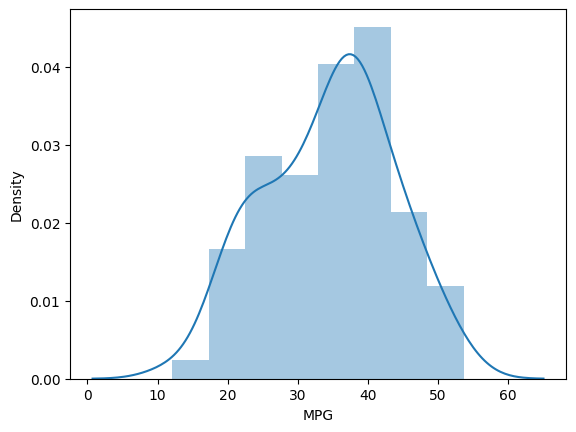

In [6]:
sns.distplot(df['MPG'])
plt.show()

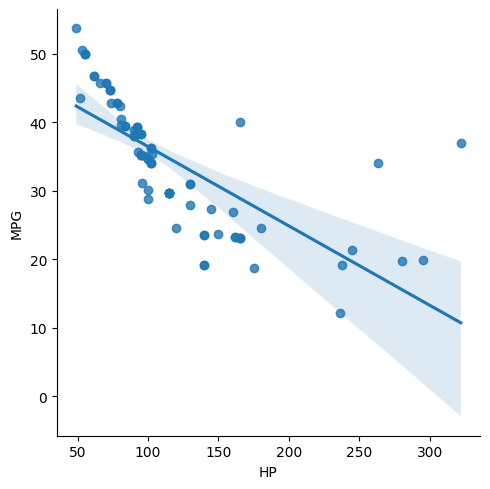

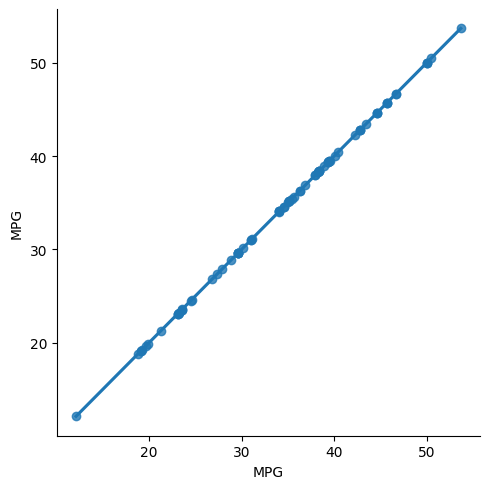

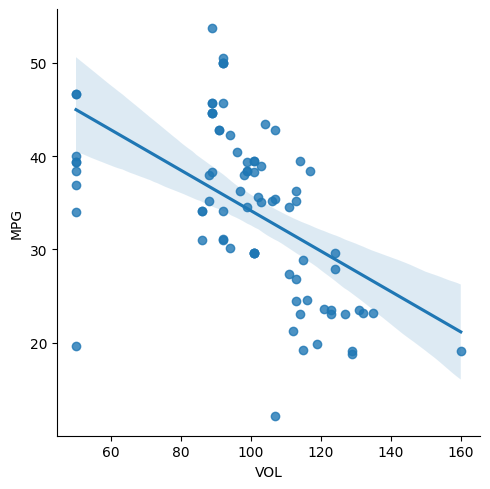

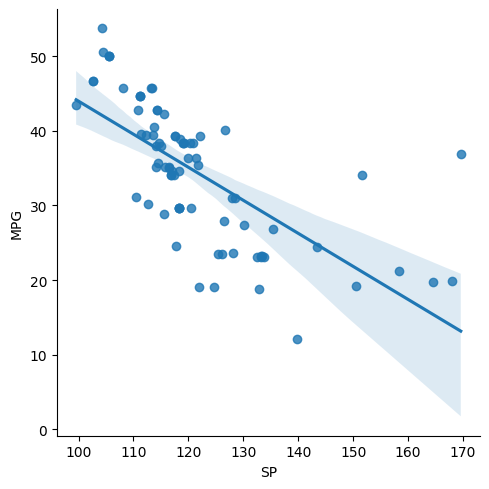

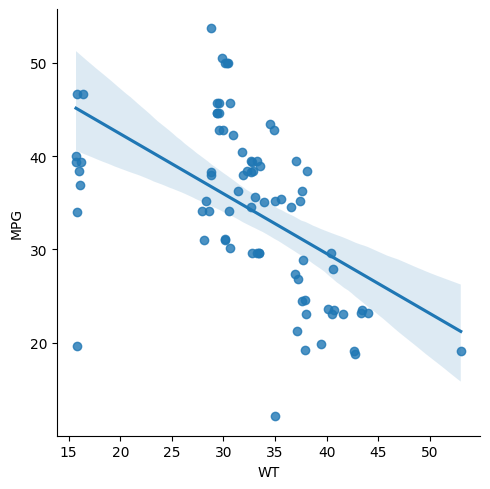

In [4]:
for i in df.columns:
    sns.lmplot(data=df,x=i,y="MPG")

#2 multicolinearity

In [8]:
car=df.corr()

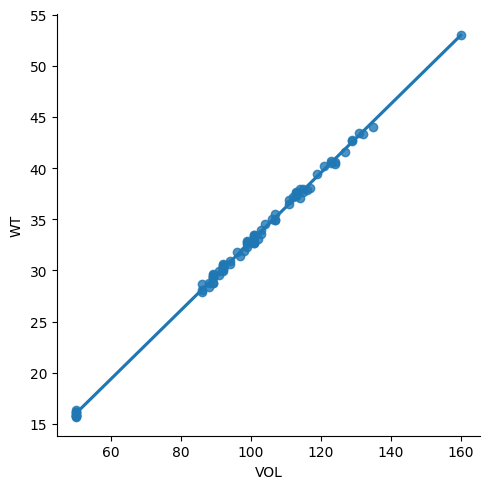

In [9]:
sns.lmplot(data=df,x="VOL",y="WT")

<Axes: >

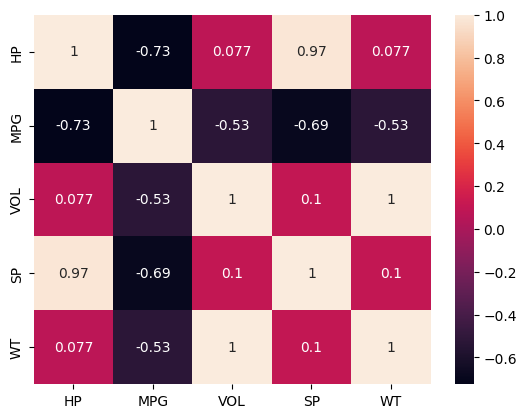

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
#multicoliniearity failed,

In [12]:
#model building

In [14]:
model=LinearRegression()

In [14]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [6]:
x=df.drop(labels='MPG',axis=1)

In [7]:
y=df[["MPG"]]

In [8]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [9]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [15]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
model.coef_  #relationship between each indepdent variable and dependent variable when all other varaibles are held constant.

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [21]:
model.intercept_

array([30.67733585])

In [22]:
y_predict=model.predict(x)

In [23]:
y_predict

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [24]:
mean_absolute_error(df["MPG"],y_predict)

3.267968285420799

In [25]:
r2_score(df["MPG"],y_predict)

0.7705372737359844

In [26]:
error=y-y_predict
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


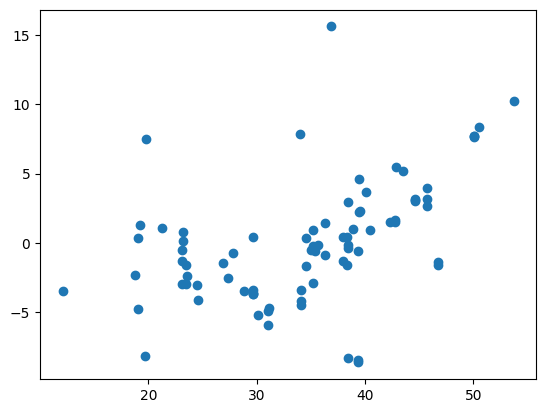

In [27]:
plt.scatter(x=df["MPG"],y=error)   #ZERO RESIDUAL FAILED

day-2 stats model

### pip install statsmodels

In [16]:
python --version

NameError: name 'python' is not defined

In [29]:
import statsmodels.formula.api as smf

In [30]:
model_1=smf.ols(formula='MPG~HP+VOL+SP+WT',data=df).fit()

In [31]:
model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [32]:
model_1.aic   # akaike information criterion used to compare to fit of different regression models

#the lower the AIC, the better the model fit

np.float64(477.9279049354879)

In [33]:
model_1.bic  # bayesion information criterion  is used to compare goodness of fits of differenet regression model
#a lower bic indicates better balance between model fit and complexcity

np.float64(489.9001507088501)

In [34]:
model_1.rsquared #residual sum of square level of variance in the error term or residuals of a regression model.

# coefficient of dertermination
#RSS-sum of squares residual
#TSS- total sumof squares
# the highrer the rsquared the better the model fit.

np.float64(0.7705372737359842)

In [35]:
model_1.rsquared_adj  #modified version of rsquared that adjusts for predictors that are not significant in a regression  model

#lower adjusted rsquared indicates the additional input variables are not adding value to the model
#highter the r squared  the better the model fit

np.float64(0.7584602881431413)

In [36]:
model_2=smf.ols(formula='MPG~HP',data=df).fit()

In [37]:
model_2.aic

np.float64(530.7452702659343)

In [38]:
model_2.bic

np.float64(535.5341685752792)

In [39]:
model_2.rsquared

np.float64(0.5256806086282022)

In [40]:
model_2.rsquared_adj

np.float64(0.5196765656994453)

In [41]:
model_2=smf.ols(formula="MPG~HP+VOL",data=df).fit()

In [42]:
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("R2SCORE",model_2.rsquared)
print("R2SQUARED",model_2.rsquared_adj)

AIC 480.6569237052377
BIC 487.84027116925506
R2SCORE 0.7506606277376422
R2SQUARED 0.7442673105001458


In [43]:
#conlusion this model is highest accuarcy
model_finalmodel=smf.ols(formula="MPG~HP+SP+WT",data=df).fit()
print("AIC",model_finalmodel.aic)
print("BIC",model_finalmodel.bic)
print("R2SCORE",model_finalmodel.rsquared)
print("R2SQUARED",model_finalmodel.rsquared_adj)

AIC 476.29927501529767
BIC 485.87707163398744
R2SCORE 0.769482813998346
R2SQUARED 0.7605016249333465


In [44]:
# for highest accuracy can go with data transformation

Data  tranformation techniques for contionus data

log transformation
squareroot transformation
cuberoot transformation
reciprocal transformation
boxcox transformation
standard scaler
min max scaler
robust scaler

if is discrete

label coding
onehot encoding

In [45]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [46]:
df1=df.copy()

In [47]:
df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [48]:
import numpy as np

In [49]:
df1["log_hp"]=np.log(df["HP"])
df1["log_MPG"]=np.log(df["MPG"])
df1["log_VOL"]=np.log(df["VOL"])
df1["log_sp"]=np.log(df["SP"])
df1["log_wt"]=np.log(df["WT"])


In [50]:
df1

,HP,MPG,VOL,SP,WT,log_hp,log_MPG,log_VOL,log_sp,log_wt
0,49,53.700681,89,104.185353,28.762059,3.891820,3.983426,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,3.912291,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,3.912291,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,3.822018,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,3.922057,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.608212,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,2.954800,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.526361,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,2.987384,4.779123,5.123633,3.674352


<function matplotlib.pyplot.show(close=None, block=None)>

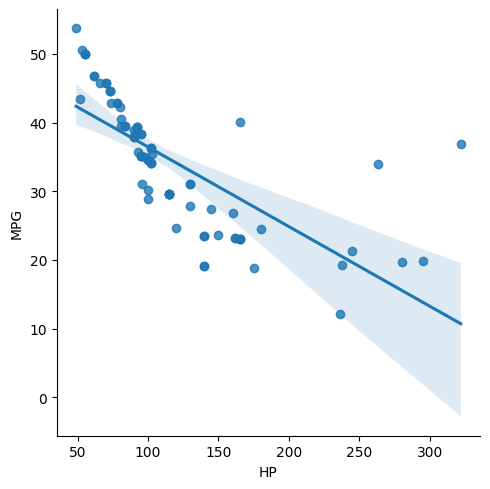

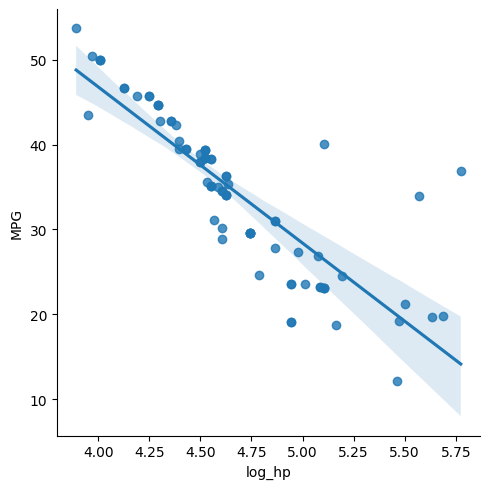

In [51]:
sns.lmplot(data=df1,x="HP",y="MPG")
plt.show
sns.lmplot(data=df1,x="log_hp",y="MPG")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

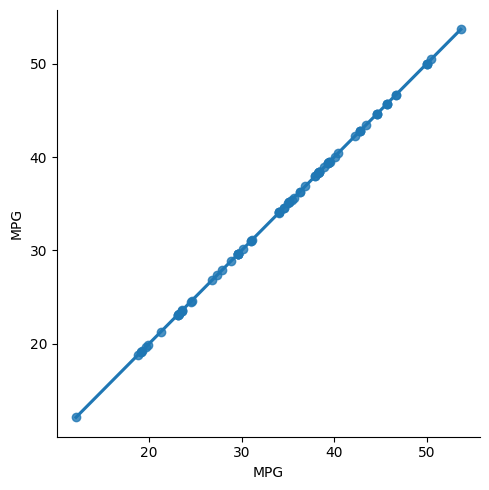

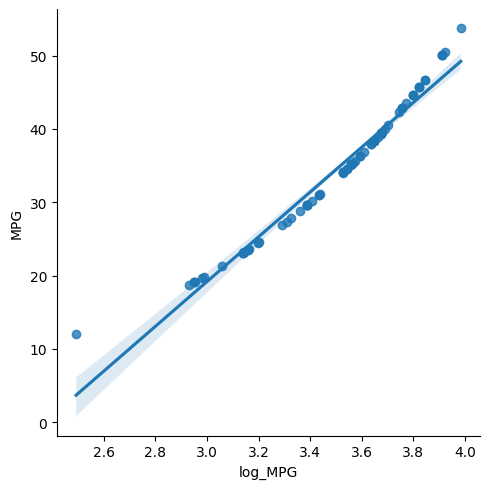

In [52]:
sns.lmplot(data=df1,x="MPG",y="MPG")
plt.show
sns.lmplot(data=df1,x="log_MPG",y="MPG")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

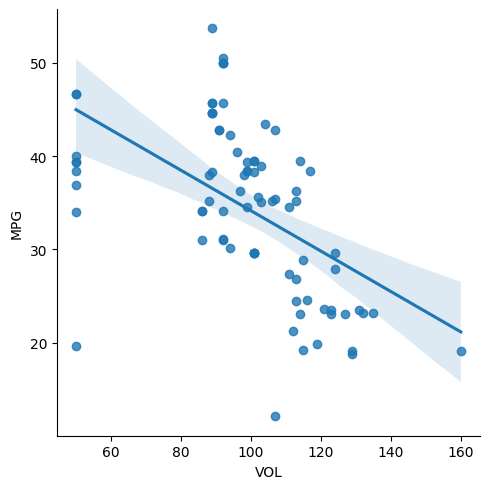

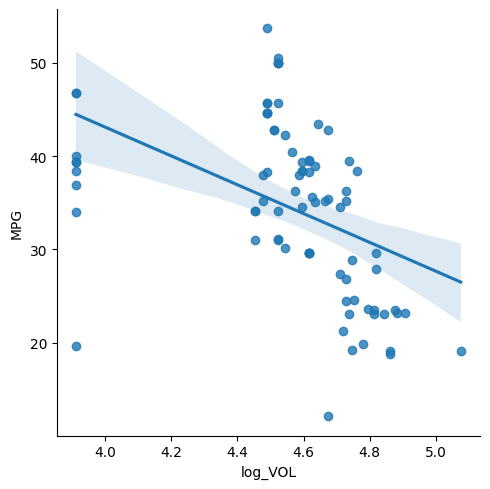

In [53]:
sns.lmplot(data=df1,x="VOL",y="MPG")
plt.show
sns.lmplot(data=df1,x="log_VOL",y="MPG")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

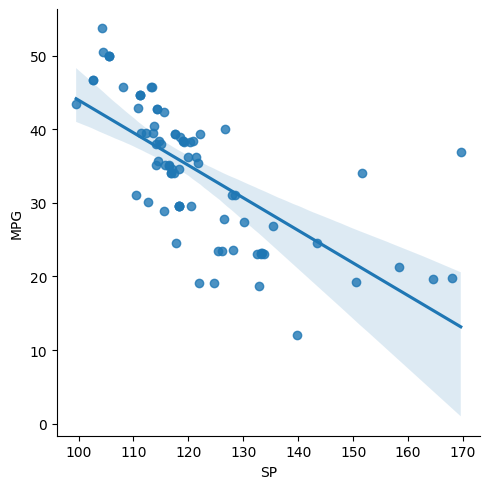

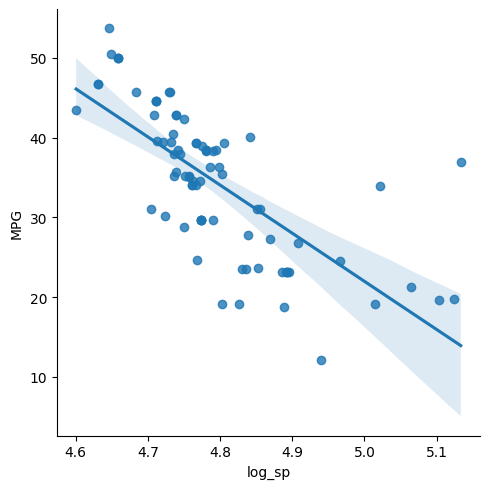

In [54]:
sns.lmplot(data=df1,x="SP",y="MPG")
plt.show
sns.lmplot(data=df1,x="log_sp",y="MPG")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

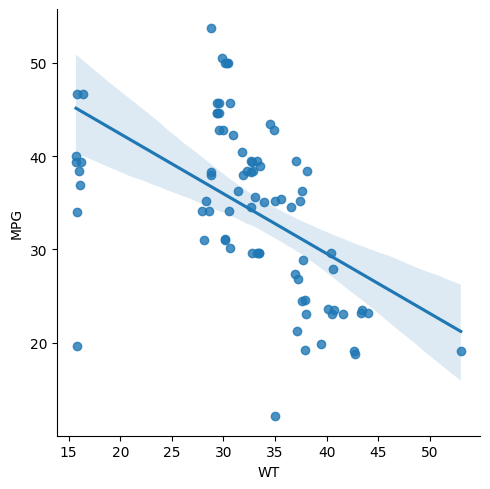

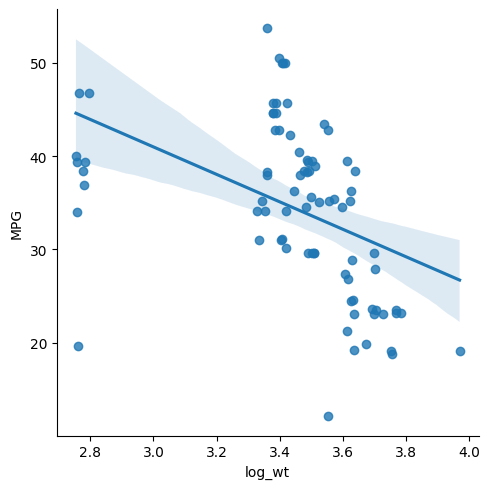

In [55]:
sns.lmplot(data=df1,x="WT",y="MPG")
plt.show
sns.lmplot(data=df1,x="log_wt",y="MPG")
plt.show

In [56]:
df1

,HP,MPG,VOL,SP,WT,log_hp,log_MPG,log_VOL,log_sp,log_wt
0,49,53.700681,89,104.185353,28.762059,3.891820,3.983426,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,3.912291,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,3.912291,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,3.822018,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,3.922057,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.608212,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,2.954800,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.526361,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,2.987384,4.779123,5.123633,3.674352


<Axes: >

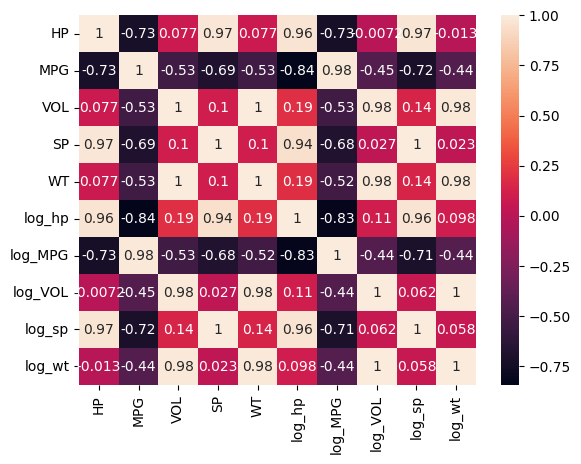

In [57]:
sns.heatmap(df1.corr(),annot=True)

Articulation of Linear Regression:

LR is a supervised machine learning alogoirthm used for predicting a continuous value based on the relationship between variables

it assumes  a linear relationship between the indepedent(X) and dependent variable(y).
in simple terms "it tries to draw the best stright line through the data points.

type of linear regression:
single linear regression:

one independent variable(x) and one dependent variable(y) example: predicting a persons weight from their height.

multiple linear regression:
more that one indepedent variable (x1,x2,x3...........xn)
example: predicting house price (y) from area,number of bedrooms, location... etc,

matematical equations:
the equation of linear regression are

y=b(beta)0+b1x+..........
where: Y--> dependent variable(output we want to predict)
b0--->intercept
b1--->slope(how much y changes with one unit change in X)
x--> indepedent variable
e--> error term(difference between predicted 


how it works:
1.plot data points(x vs y)
2.fit a stright line that minimizes the distance(error) between predicted values and actual values
3.the best fitline is found using the least squares method:
minimize the sum of squared errors (difference between actual and predicted y)

example:
suppose we want to predict student marks(y) based on hours studies(x).
data shows:as hours increase , marks also increase
equation might look like.
marks=30+5*(hours studies)
marks=30+5(6)=60

Applications: predicting house prices
forecating sales.
estimating risk in finance
medical predictions(predicting blood pressure from lifestyle factors)

In [61]:
model_2=smf.ols(formula="MPG~log_hp+VOL+log_sp",data=df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("R2SCORE",model_2.rsquared)
print("R2SQUARED",model_2.rsquared_adj)

AIC 396.92283101805924
BIC 406.500627636749
R2SCORE 0.9134805433870518
R2SQUARED 0.9101096554670668


the final model

In [63]:
y_stats_pred=model_2.predict()
y_stats_pred

array([52.50818905, 48.89204579, 48.89204579, 45.77209264, 49.49863646,
       46.00269867, 48.89204579, 48.34505739, 48.34505739, 42.1673822 ,
       43.17478536, 44.49572302, 40.56747463, 43.17478536, 44.71901609,
       43.17478536, 42.65197164, 44.49572302, 42.65197164, 38.54140709,
       38.70693521, 39.98187783, 38.02881149, 40.26598674, 38.9902486 ,
       42.56295602, 37.26310209, 38.70693521, 44.93563374, 35.28268179,
       36.26784232, 37.2640766 , 35.81801441, 34.52909674, 37.89019993,
       37.01248866, 37.78768951, 35.42894759, 35.42894759, 33.01261744,
       33.91521523, 34.46335254, 34.95573323, 35.86216134, 34.88224977,
       34.47083629, 33.52158852, 34.23523555, 33.51605515, 29.97063887,
       29.97063887, 29.97063887, 28.13223341, 26.75838584, 26.65937872,
       27.40312427, 32.51923734, 29.97063887, 32.25459269, 31.28709897,
       27.52036961, 25.99807277, 23.58982725, 24.25251991, 23.7327376 ,
       29.20735553, 23.8019775 , 22.68552914, 23.02969395, 23.31

In [68]:
mean_absolute_error(df["MPG"],y_predict)

3.267968285420799

In [70]:
mean_absolute_error(df["MPG"],y_stats_pred)

1.5953938252580688

detecting influencer/outliers

In [71]:
model_2_outliers=model_2.get_influence()

In [72]:
dis,_=model_2_outliers.cooks_distance

In [73]:
dis

array([4.76197795e-03, 2.62846787e-03, 2.62846787e-03, 1.04294457e-05,
       2.26107737e-03, 1.59812312e-04, 2.62846787e-03, 1.10823286e-02,
       1.10823286e-02, 1.78880399e-05, 1.93448992e-03, 7.39214449e-02,
       2.46185959e-03, 1.93448992e-03, 1.12245392e-03, 1.93448992e-03,
       1.80830394e-05, 7.39214449e-02, 1.80830394e-05, 1.08067207e-04,
       6.60294076e-05, 7.65615616e-03, 6.31815538e-05, 2.89601772e-05,
       2.85776752e-04, 5.55441337e-02, 2.31040499e-03, 6.60294076e-05,
       4.43299747e-03, 1.01317646e-05, 8.69872064e-03, 3.07926699e-03,
       9.56689798e-05, 2.55419162e-03, 1.90109801e-03, 4.60195805e-04,
       2.04146288e-05, 1.54893839e-03, 1.54893839e-03, 2.57707249e-03,
       1.05219849e-03, 2.76424037e-04, 4.78715927e-04, 4.89194621e-04,
       3.79790937e-04, 4.32860307e-06, 6.37595958e-04, 3.67242737e-04,
       4.59776823e-03, 1.34975360e-04, 1.34975360e-04, 1.34975360e-04,
       2.51418201e-03, 1.15648190e-02, 3.96639417e-05, 2.12315459e-04,
      

In [74]:
_

array([0.99995378, 0.99998588, 0.99998588, 1.        , 0.99998954,
       0.99999995, 0.99998588, 0.99975187, 0.99975187, 1.        ,
       0.99999234, 0.98988337, 0.99998761, 0.99999234, 0.99999742,
       0.99999234, 1.        , 0.98988337, 1.        , 0.99999998,
       0.99999999, 0.99988101, 0.99999999, 1.        , 0.99999983,
       0.99414118, 0.99998908, 0.99999999, 0.99995993, 1.        ,
       0.99984661, 0.99998063, 0.99999998, 0.99998666, 0.9999926 ,
       0.99999957, 1.        , 0.99999509, 0.99999509, 0.99998642,
       0.99999773, 0.99999984, 0.99999953, 0.99999951, 0.9999997 ,
       1.        , 0.99999917, 0.99999972, 0.9999569 , 0.99999996,
       0.99999996, 0.99999996, 0.99998708, 0.99972997, 1.        ,
       0.99999991, 0.99994539, 0.99999996, 0.99984703, 0.9999342 ,
       1.        , 0.9999685 , 1.        , 0.99999887, 1.        ,
       0.42041709, 0.99999941, 0.99999987, 1.        , 0.99911041,
       0.32091581, 0.99998857, 0.99999681, 0.99999971, 0.99958

<StemContainer object of 3 artists>

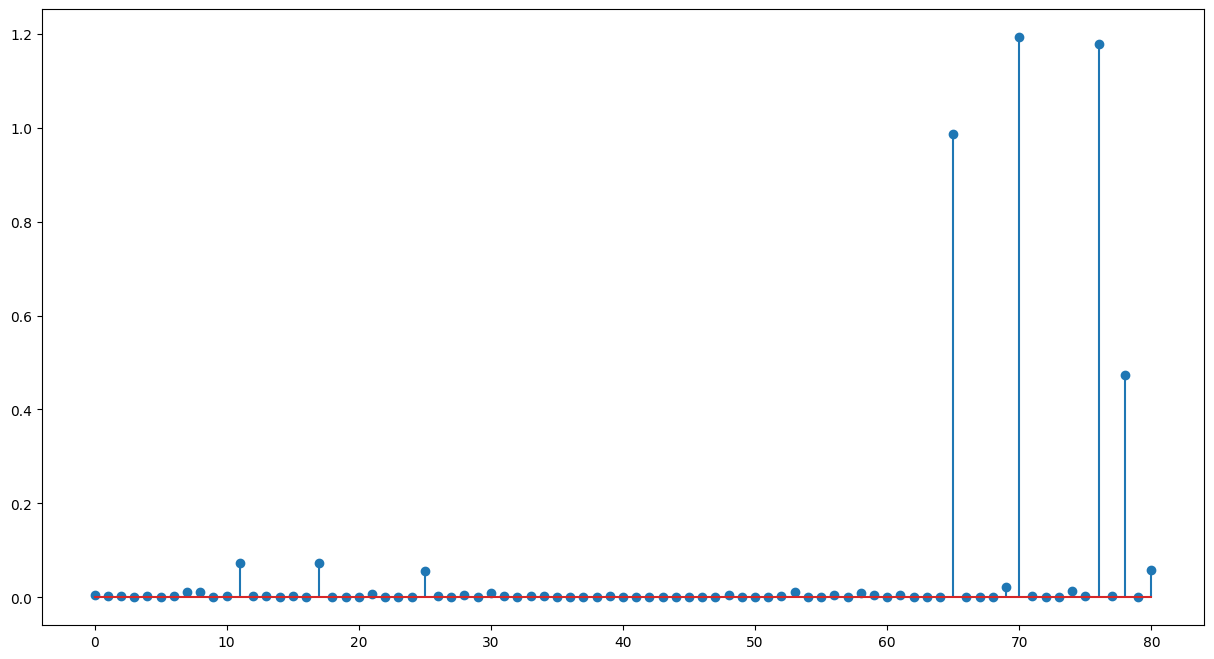

In [77]:
plt.figure(figsize=(15,8))
plt.stem(dis)

In [78]:
df1["Dis"]=dis

In [79]:
df1

,HP,MPG,VOL,SP,WT,log_hp,log_MPG,log_VOL,log_sp,log_wt,Dis
0,49,53.700681,89,104.185353,28.762059,3.891820,3.983426,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,3.912291,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,3.912291,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,3.822018,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,3.922057,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.608212,3.912023,5.133434,2.780864,1.177456
77,238,19.197888,115,150.576579,37.923113,5.472271,2.954800,4.744932,5.014472,3.635561,0.002527
78,263,34.000000,50,151.598513,15.769625,5.572154,3.526361,3.912023,5.021236,2.758086,0.472693
79,295,19.833733,119,167.944460,39.423099,5.686975,2.987384,4.779123,5.123633,3.674352,0.000889


In [80]:
df1.sort_values(by="Dis",ascending=False)

,HP,MPG,VOL,SP,WT,log_hp,log_MPG,log_VOL,log_sp,log_wt,Dis
70,280,19.678507,50,164.598513,15.823060,5.634790,2.979527,3.912023,5.103509,2.761468,1.192439
76,322,36.900000,50,169.598513,16.132947,5.774552,3.608212,3.912023,5.133434,2.780864,1.177456
65,165,40.050000,50,126.598513,15.712859,5.105945,3.690129,3.912023,4.841021,2.754479,0.985781
78,263,34.000000,50,151.598513,15.769625,5.572154,3.526361,3.912023,5.021236,2.758086,0.472693
17,92,39.354094,50,117.598513,16.194122,4.521789,3.672600,3.912023,4.767276,2.784648,0.073921
...,...,...,...,...,...,...,...,...,...,...,...
3,70,45.696322,92,113.461264,30.632114,4.248495,3.822018,4.521789,4.731461,3.422049,0.000010
29,103,35.404192,107,121.840817,35.549360,4.634729,3.566830,4.672829,4.802715,3.570922,0.000010
62,140,23.515917,131,126.048103,43.390988,4.941642,3.157678,4.875197,4.836664,3.770252,0.000009
68,165,23.103172,123,133.312342,40.472042,5.105945,3.139970,4.812184,4.892695,3.700611,0.000007


In [81]:
from statsmodels.graphics.regressionplots import influence_plot

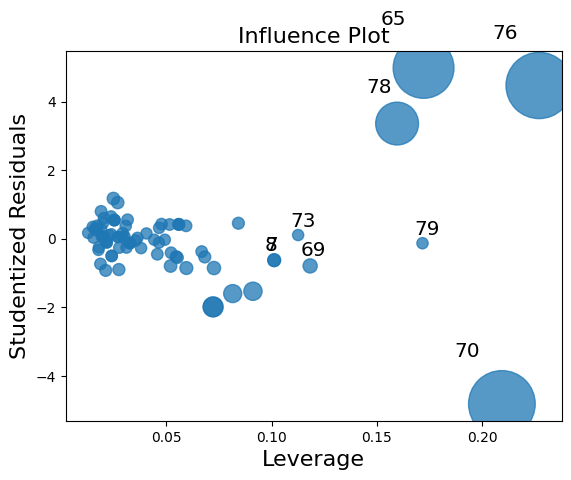

In [82]:
influence_plot(model_2)
plt.show()

In [83]:
noliners=df1.drop(labels=[70,78,65,76])

In [84]:
noliners

,HP,MPG,VOL,SP,WT,log_hp,log_MPG,log_VOL,log_sp,log_wt,Dis
0,49,53.700681,89,104.185353,28.762059,3.891820,3.983426,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,3.912291,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,3.912291,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,3.822018,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,3.922057,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698,4.941642,2.948973,4.859812,4.802907,3.752293,0.014300
75,175,18.762837,129,132.864163,42.778219,5.164786,2.931878,4.859812,4.889327,3.756029,0.002320
77,238,19.197888,115,150.576579,37.923113,5.472271,2.954800,4.744932,5.014472,3.635561,0.002527
79,295,19.833733,119,167.944460,39.423099,5.686975,2.987384,4.779123,5.123633,3.674352,0.000889


In [92]:
model_2=smf.ols(formula="MPG~log_hp+VOL+log_sp",data=noliners).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("R2SCORE",model_2.rsquared)
print("R2SQUARED",model_2.rsquared_adj)

AIC 232.50088232418526
BIC 241.87610401159998
R2SCORE 0.9870260995889484
R2SQUARED 0.9864929255994531


here is my final model... we got good accuracy

In [93]:
y_pred_nooutliers=model_2.predict()

In [94]:
y_pred_nooutliers

array([54.24839821, 50.29431005, 50.29431005, 46.57192861, 51.01188385,
       46.57796686, 50.29431005, 45.9816966 , 45.9816966 , 42.53369664,
       43.31420653, 41.32851179, 41.04478144, 43.31420653, 45.1450324 ,
       43.31420653, 42.84630688, 41.32851179, 42.84630688, 39.08288523,
       38.9147144 , 41.19811675, 38.29031799, 40.52108788, 38.35913562,
       39.11575389, 38.80956748, 38.9147144 , 46.83164239, 35.61187682,
       37.46890964, 37.49157382, 35.37093191, 35.27115926, 38.23108962,
       36.9025219 , 36.93010717, 33.97959598, 33.97959598, 31.57784411,
       34.61270268, 34.63830536, 33.95377845, 34.69190549, 34.78719461,
       34.01293186, 33.95806938, 34.09977086, 31.6382633 , 28.94560082,
       28.94560082, 28.94560082, 28.81867937, 26.02039008, 25.98052231,
       27.90745891, 31.20214108, 28.94560082, 31.04567379, 31.74384592,
       26.8556723 , 25.66086871, 24.09745393, 24.16821553, 23.35810871,
       22.77597659, 22.61568348, 22.66573971, 21.79867166, 22.63

In [90]:
mean_absolute_error(df["MPG"],y_predict)

3.267968285420799

In [91]:
mean_absolute_error(df["MPG"],y_stats_pred)

1.5953938252580688

In [96]:
mean_absolute_error(noliners["MPG"],y_pred_nooutliers)

0.8076634355409258

In [ ]:
#homoscacity

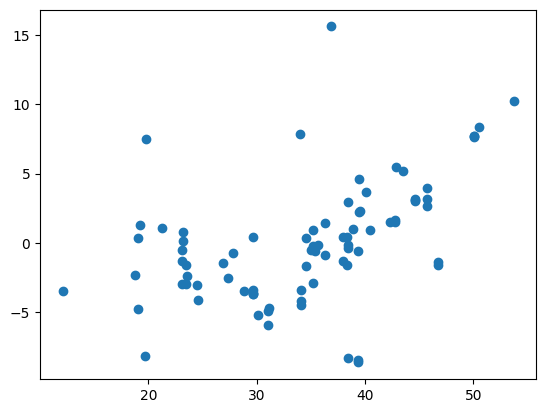

In [97]:
plt.scatter(x=df["MPG"],y=error)

In [98]:
error_1=noliners["MPG"]-y_pred_nooutliers

In [100]:
error_1

0    -0.547717
1    -0.280909
2    -0.280909
3    -0.875606
4    -0.507652
        ...   
74   -2.263620
75   -0.749712
77    0.697231
79    1.159884
80   -0.987145
Name: MPG, Length: 77, dtype: float64

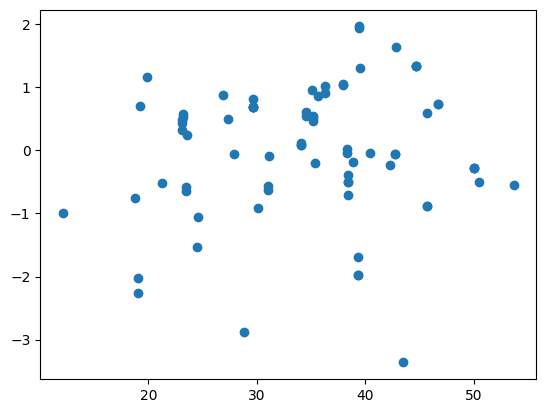

In [101]:
plt.scatter(x=noliners["MPG"],y=error_1)

In [ ]:
#zero residual mean

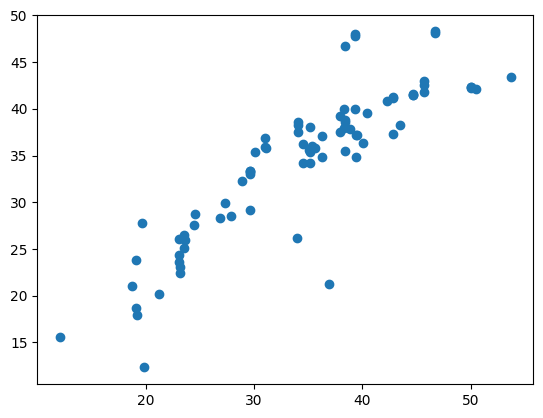

In [102]:
plt.scatter(x=y,y=y_predict)

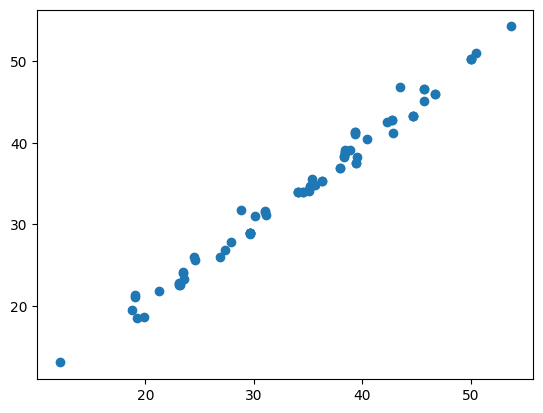

In [103]:
plt.scatter(x=noliners["MPG"],y=y_pred_nooutliers)

In [86]:
import pickle

In [88]:
pickle.dump(model_2,open("Batch_13.pkl",'wb'))